In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('../data/processed/churn_cleaned.csv')

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [14]:
# One-Hot Encoding (For Multi-category Columns)
cat_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaymentMethod']

df_final = pd.get_dummies(df, columns=cat_features, drop_first=True)
# Convert all Boolean columns to Integers (0 and 1)
bool_cols = df_final.select_dtypes(include='bool').columns
df_final[bool_cols] = df_final[bool_cols].astype(int)

In [15]:
print(f"New shape after encoding: {df_final.shape}")
df_final.head()

New shape after encoding: (7043, 25)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,1,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [16]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Scale the numerical features
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])

In [17]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,...,0,1,1,0,0,1,0,0,0,0
4,1,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# Splitting the dataset into testing and training sets

X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (5634, 24)
Testing shape: (1409, 24)


### Initialize and Train the model

In [21]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Training Random Forest Model

In [23]:

# Setting random_state for reproducibility and class_weight='balanced' 
# to help with the imbalance issue we discussed.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



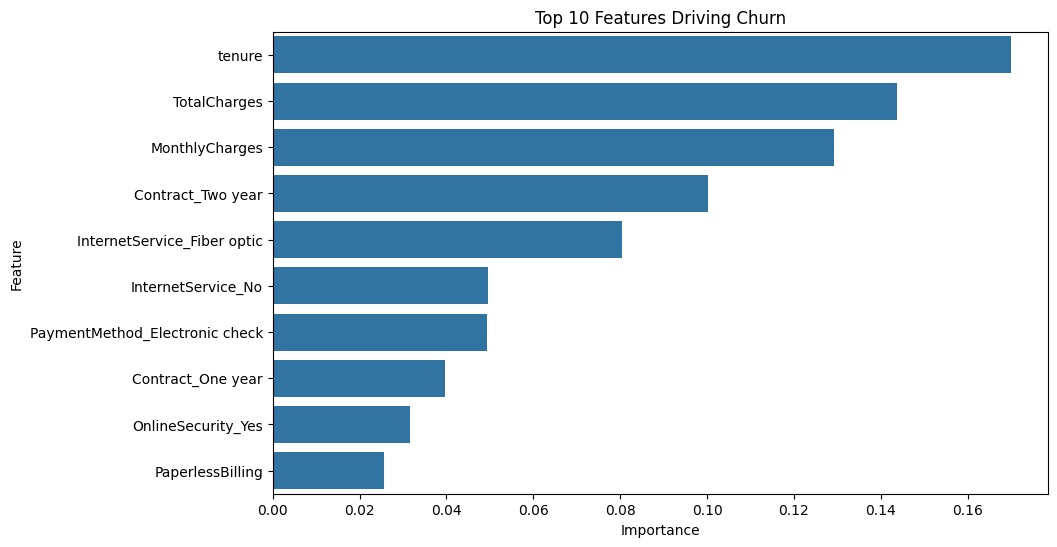

In [26]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot the top 10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Features Driving Churn')
plt.show()

In [28]:
df_final.to_csv('../data/processed/telco_final_processed.csv', index=False)